# Text Classification + Row Text Processing
sources:<br>
https://www.nltk.org/book/ch06.html<br>
https://www.nltk.org/book/ch03.html<br>
https://www.coursera.org/learn/language-processing/home/week/1<br>

In [1]:
import nltk

# Supervised Classification
What is Classification in general?
- Classification is the task of choosing the correct class label for a given input.

Text Classification:
- Text classification is a way to categorize *documents* or *pieces of text*. By examining the word usage in a piece of text, classifiers can decide what **class label** to assign to it.
- Classification works by learning from **labeled feature sets**, or training data, to later classify an **unlabeled feature set**
-  A feature set is basically a **key-value mapping** of feature *names* to feature *values*

## The Learning porcess
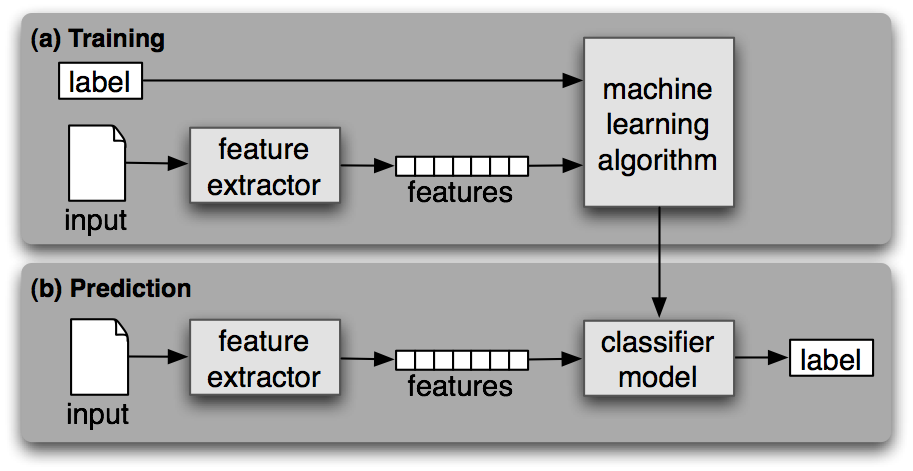

## Applications 
- Spam	filtering	
- Topic	detection
- Language	detection	
- Sentiment Analysis
- ...

# First: Preprocessing Text...

## What is text?
You can think of text as a sequence of
- Characters
- **Words**
- Phrases and named entities
- Sentences
- Paragraphs
- ...


## What is a word?
- A word is a meaningful sequence of characters
### How to find the boundaries of words?
- In *English* we can split a sentence by spaces or punctuation
    - Friends, Romans, Countrymen, lendme your ears;
    - Output:[Friends, Romans, Countrymen, lend, me, your, ears]
- In *German* there are compound words which are written without spaces
    - “Rechtsschutzversicherungsgesellschaften” stands for “insurance companies which provide legal protection”
- In *Japanese* there are no spaces at all!
    - Butyoucanstillreaditright?
- In *Arabic*?

## Tokenization
Tokenization is a process that *splits* an input sequence into so-called **tokens**
- You can think of a token as a **useful unit** for semantic processing
- Can be a word, sentence, paragraph, etc.
- NLTK includes some off-the-shelf tokenizers

In [2]:
text = "This is Andrew’s text, isn’t it?"

### Whitespace tokenizer

In [3]:
tokenizer = nltk.tokenize.WhitespaceTokenizer()
tokens = tokenizer.tokenize(text)
print(tokens)

['This', 'is', 'Andrew’s', 'text,', 'isn’t', 'it?']


### Word Punctution Tokenizer

In [4]:
tokenizer = nltk.tokenize.WordPunctTokenizer()
tokens = tokenizer.tokenize(text)
print(tokens)

['This', 'is', 'Andrew', '’', 's', 'text', ',', 'isn', '’', 't', 'it', '?']


### Regular Expression Tokenizer
We can come up with a set of rules

In [5]:
from nltk.tokenize import RegexpTokenizer
s = "Good muffins cost $3.88\nin New York.  Please buy me\ntwo of them.\n\nThanks."
tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|\S+')
print(tokenizer.tokenize(s))

['Good', 'muffins', 'cost', '$3.88', 'in', 'New', 'York', '.', 'Please', 'buy', 'me', 'two', 'of', 'them', '.', 'Thanks', '.']


This may go wrong in many ways...

### Treebank Word Tokenizer

In [6]:
from nltk.tokenize import TreebankWordTokenizer
text = "Good muffins cost $3.88\nin New York. Please buy me\ntwo of them.\n\nThanks."
print(s + "\n______________")
tokenizer = TreebankWordTokenizer()
print(tokenizer.tokenize(s))

Good muffins cost $3.88
in New York.  Please buy me
two of them.

Thanks.
______________
['Good', 'muffins', 'cost', '$', '3.88', 'in', 'New', 'York.', 'Please', 'buy', 'me', 'two', 'of', 'them.', 'Thanks', '.']


word_tokenize works only at the sentence level. So you'll have to split at the sentence level and the tokenize the sentences.

In [7]:
sents = nltk.sent_tokenize(text)
print(tokenizer.tokenize_sents(sents))

[['Good', 'muffins', 'cost', '$', '3.88', 'in', 'New', 'York', '.'], ['Please', 'buy', 'me', 'two', 'of', 'them', '.'], ['Thanks', '.']]


## Token normalization
- We may want the same token for different forms of the word
    - wolf, wolves -> wolf
    - talk, talks -> talk

### Stemming
- A process of removing and **replacing suffixes** to get to the root form of the word, which is called the **stem**
- Usually refers to **heuristics** that chop off suffixes

In [8]:
raw = """DENNIS: Listen, strange women lying in ponds distributing swords
... is no basis for a system of government.  Supreme executive power derives from
... a mandate from the masses, not from some farcical aquatic ceremony. mice"""
tokenizer = TreebankWordTokenizer()
tokens = tokenizer.tokenize(raw)

#### Porter Stemmer
- 5 heuristic phases of word reductions, applied sequentially
- Example of phase 1 rules:
    - SSES → SS <br>
        e.g. caresses → caress
    - IES→ I <br>
        e.g. ponies →poni
    - SS→ SS <br>
        e.g. caress → caress
    - S→ <br>
        e.g. cats → cat

Problem: fails on irregular forms, produces non-words


In [9]:
porter = nltk.PorterStemmer()
[(t,porter.stem(t)) for t in tokens]

[('DENNIS', 'denni'),
 (':', ':'),
 ('Listen', 'listen'),
 (',', ','),
 ('strange', 'strang'),
 ('women', 'women'),
 ('lying', 'lie'),
 ('in', 'in'),
 ('ponds', 'pond'),
 ('distributing', 'distribut'),
 ('swords', 'sword'),
 ('is', 'is'),
 ('no', 'no'),
 ('basis', 'basi'),
 ('for', 'for'),
 ('a', 'a'),
 ('system', 'system'),
 ('of', 'of'),
 ('government.', 'government.'),
 ('Supreme', 'suprem'),
 ('executive', 'execut'),
 ('power', 'power'),
 ('derives', 'deriv'),
 ('from', 'from'),
 ('a', 'a'),
 ('mandate', 'mandat'),
 ('from', 'from'),
 ('the', 'the'),
 ('masses', 'mass'),
 (',', ','),
 ('not', 'not'),
 ('from', 'from'),
 ('some', 'some'),
 ('farcical', 'farcic'),
 ('aquatic', 'aquat'),
 ('ceremony.', 'ceremony.'),
 ('mice', 'mice')]

***Other Stemmers***

In [11]:
lancaster = nltk.LancasterStemmer()
[(t,lancaster.stem(t)) for t in tokens]

[('DENNIS', 'den'),
 (':', ':'),
 ('Listen', 'list'),
 (',', ','),
 ('strange', 'strange'),
 ('women', 'wom'),
 ('lying', 'lying'),
 ('in', 'in'),
 ('ponds', 'pond'),
 ('distributing', 'distribut'),
 ('swords', 'sword'),
 ('is', 'is'),
 ('no', 'no'),
 ('basis', 'bas'),
 ('for', 'for'),
 ('a', 'a'),
 ('system', 'system'),
 ('of', 'of'),
 ('government.', 'government.'),
 ('Supreme', 'suprem'),
 ('executive', 'execut'),
 ('power', 'pow'),
 ('derives', 'der'),
 ('from', 'from'),
 ('a', 'a'),
 ('mandate', 'mand'),
 ('from', 'from'),
 ('the', 'the'),
 ('masses', 'mass'),
 (',', ','),
 ('not', 'not'),
 ('from', 'from'),
 ('some', 'som'),
 ('farcical', 'farc'),
 ('aquatic', 'aqu'),
 ('ceremony.', 'ceremony.'),
 ('mice', 'mic')]

### Lemmatization
- Usually refers to doing things properly with the use of a vocabulary and **morphological analysis**
- Returns the base or dictionary form of a word, which is known as the **lemma**
- Lemmatizer slower than the above stemmers.

In [12]:
wnl = nltk.WordNetLemmatizer()
lemmatizedTokens =[wnl.lemmatize(t) for t in tokens]
for index, (token, lemma) in enumerate(zip(tokens, lemmatizedTokens)):
    print(token + "\t" + lemma) 

DENNIS	DENNIS
:	:
Listen	Listen
,	,
strange	strange
women	woman
lying	lying
in	in
ponds	pond
distributing	distributing
swords	sword
is	is
no	no
basis	basis
for	for
a	a
system	system
of	of
government.	government.
Supreme	Supreme
executive	executive
power	power
derives	derives
from	from
a	a
mandate	mandate
from	from
the	the
masses	mass
,	,
not	not
from	from
some	some
farcical	farcical
aquatic	aquatic
ceremony.	ceremony.
mice	mouse


didn't handle lying, not all forms are reduced.

## Further normalization

### Normalizing capital letters
    - Us, us -> us(if both are pronoun)
    - us, US (could be pronoun and country)
    - We can use heuristics:
        −lowercasing the beginning of the sentence
        −lowercasing words in titles
        −leave mid-sentence words as they are
     - Or we can use machine learning to retrieve true casing -> hard
### Acronyms
    -eta, e.t.a., E.T.A. -> E.T.A.
    - We can write a bunch of regular expressions -> hard


# Second: Transforming tokens into features

## Bag of words (BOW)
Motivation: we’re looking for marker words like “excellent” or “disappointed”<br>
Let’s count occurrences of a particular token in our text<br>
For each token we will have a feature column, this is called **text vectorization**.

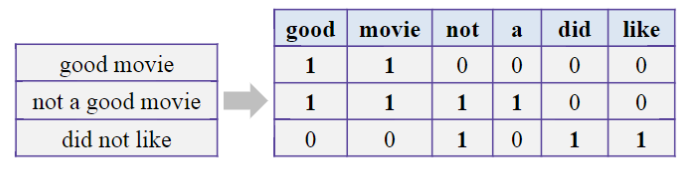

Problems:<br>
   - we loose word order, hence the name “bag of words”
   - counters are not normalized

***Let's preserve some ordering***<br>
We can count token pairs, triplets, etc. Also known as **n-grams**
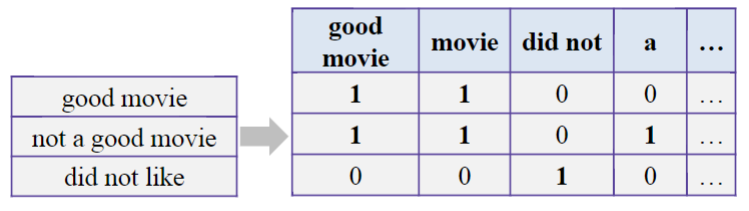

Problems:<br>
    − too many features

Let’s remove some n-grams from features based on their occurrence frequency in documents of our corpus

**High frequency n-grams**:
    - Articles, prepositions, etc. (example: and, a, the)
    - They are called stop-words, they won’t help us to discriminate texts -> remove them
    - accutully for 1-grams these words could be removed as a preprocessing step since they are the same for all English texts
    
### Removing stop words for 1-grams

In [13]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
print(stop_words)

{'herself', 'have', 'myself', 'where', 'their', 'we', 'haven', 'very', 'from', 'off', 'up', 'my', 'had', 'above', 'wouldn', "shan't", "shouldn't", 'why', 'ours', 'own', 'same', 'once', 'them', 'so', 'needn', 'for', 'ma', "didn't", 'should', 'do', 'all', 'couldn', 'didn', 'with', "it's", 'than', 'isn', 'an', 'if', 'were', 'been', 'don', "doesn't", 'down', 'hadn', 'each', 'doing', 'being', 'not', 'any', 'me', 'nor', 'the', 'you', 'as', 'hasn', 'your', 'aren', 'hers', 'be', 'but', 'no', 'itself', "hasn't", 'll', 'other', 'before', 'there', 'does', "don't", 'are', "wasn't", 'what', 'having', 'out', 'ain', "wouldn't", "she's", "couldn't", 'on', 'yourselves', 'shouldn', 'further', 'both', 'which', 'whom', 'am', 'a', 'after', 'by', "that'll", 'or', 're', 'him', "aren't", 'themselves', 'theirs', 'can', "weren't", 'too', 'y', 'she', 'until', 'about', 'against', 'only', 'most', "hadn't", 'her', 'because', "you've", 'did', 'how', 'will', 'wasn', 'd', 've', "haven't", 'who', 'has', 'and', 'below',

In [14]:
filtered_sentence = [w for w in lemmatizedTokens if not w in stop_words]
print(filtered_sentence)
print("Removed Words: ")
set(lemmatizedTokens) - set(filtered_sentence)

['DENNIS', ':', 'Listen', ',', 'strange', 'woman', 'lying', 'pond', 'distributing', 'sword', 'basis', 'system', 'government.', 'Supreme', 'executive', 'power', 'derives', 'mandate', 'mass', ',', 'farcical', 'aquatic', 'ceremony.', 'mouse']
Removed Words: 


{'a', 'for', 'from', 'in', 'is', 'no', 'not', 'of', 'some', 'the'}

**Low frequency n-grams:**<br>
- Typos, rare n-grams
- We don’t need them either, otherwise we will likely **overfit**
- We need to claculate ferquencies of our corpus to find them out

**Medium frequency n-grams:** <br>
- Those are good n-grams

*There’re a lot of medium frequency n-grams*
- It proved to be useful to look at **n-gram frequency in our corpus** for filtering out bad n-grams
- What if we use it for **ranking** of medium frequency n-grams?
- **Idea**: the n-gram with smaller frequency can be more discriminating because it can capture a characteristics in the text

## TF-IDF
### Term frequency (TF) 
**tf(*t*,*d*)** –frequency for term (or n-gram) *t*  in document *d*
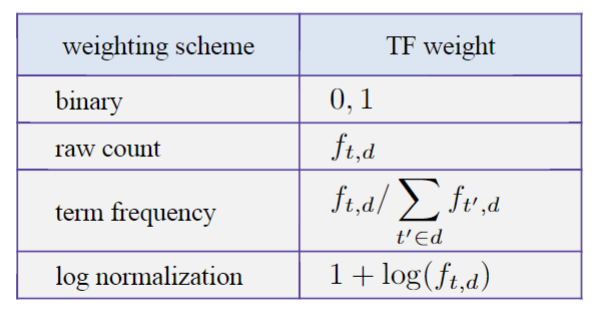
log: gives logarithmic scale to the counts

### Inverse document frequency (IDF)
- *N*=|*D*| total number of documents in corpus
- |{*d*∈*D*:*t*∈*d*}| number of documents where the term t appears
- \begin{equation*}
Idf(t,d) = log\frac{N}{|\{d∈D:t∈d\}|}
\end{equation*}

### TF-IDF
- \begin{equation*}tfidf(t,d,D) = tf(t,d) × idf(t,D) \end{equation*}<br>
- A high weight in TF-IDF is reached by a high term frequency(in the given document) and a low document frequency of the term in the whole collection of documents


## Better BOW
- Replace counters with TF-IDF
- Normalize the result row-wise (e.g. divide by L2-norm (the root of the sum of the squares of all elements))
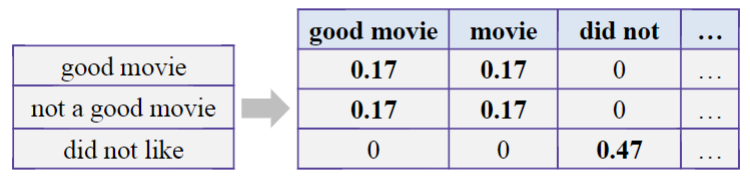

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
texts = ["good movie", "not a good movie", "did not like", "i like it", "good one"]
# using default tokenizer in TfidfVectorizer
tfidf = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1, 2))
tfidf.fit(texts) #calcualate the values
features = tfidf.transform(texts) #make the vectors
pd.DataFrame(
    features.todense(),
    columns=tfidf.get_feature_names()
)

,good movie,like,movie,not
0,0.707107,0.000000,0.707107,0.000000
1,0.577350,0.000000,0.577350,0.577350
2,0.000000,0.707107,0.000000,0.707107
3,0.000000,1.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000


## Others.. Word Vectors
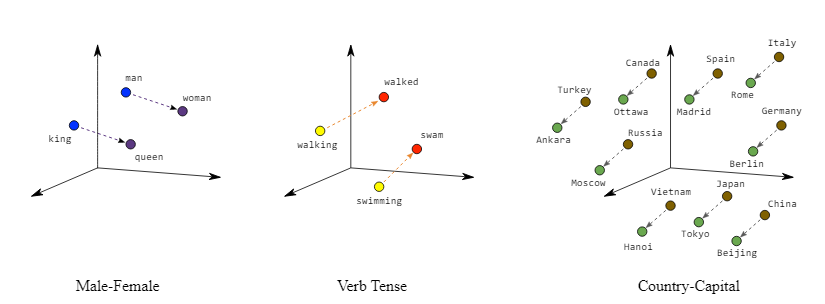